# Compte Rendu du TP3 Optimisation M1 

* Dang, Maï-Anh M1 SAR
* Kim, Juyeon M1 SAR
* octobre 16 2023

## Problème 1.

### Enoncé

Soit la fonction $J(x_1,x_2) = (x_1-1)^2 +2(x_1^2-x_2)^2$. Il s’agit d’une banane de Rosenbrock, mais avec un facteur 2 au
lieu de 10.
Implanter la méthode du gradient à pas fixe pour déterminer le minimum de cette fonction.

Schéma général de l’algorithme :

Notations :
* $X_n$ et $X_{n+1}$ : point initial et point final de l’itération 𝑛.
* 𝑑𝑋 : pas de déplacement pour une itération
* 𝑛 et $n_{max}$ : compteur d’itérations et nombre maximal d’itérations autorisé
* $X_0$ : point de départ de l’algorithme
* 𝛼 : pas de recherche
* 𝜀 : critère de précision
* 𝑐𝑜𝑛𝑣𝑒𝑟𝑔𝑒 : indicateur booléen de convergence

Algorithme :
* Choix des paramètres de l’algorithme : $X_0$, 𝛼, 𝜀, $n_{max}$
* Initialisation : $X_n$ ← $X_0$ , 𝑑𝑋 ← 1, 𝑛 ← 0
* Tant que 𝑑𝑋 > 𝜀 et 𝑛 < $n_{max}$:
    * $X_{n+1}$ ← $X_{n}$  - 𝛼. ∇$J(X_{n})$
    * 𝑑𝑋 ← ‖ $X_{n+1}$ - $X_n$‖
    *  $X_{n}$←  $X_{n+1}$
    * $n ← 𝑛 + 1$
* converge ← dX &leq; &epsilon;

### Fonctions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gradient import *
#import J, gradient_J, gradient_descent, gradient_descent_n, base_fun, J3, gradient_J3, systeme, gradient_descent_optimal

### Test de l'algorithme

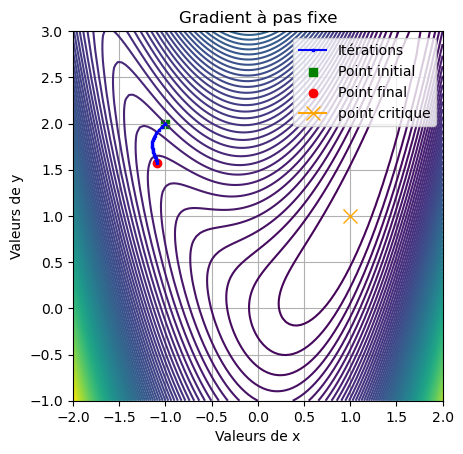

Ne converge pas après 20 iterations.


In [4]:
# Test de l'algorithme : 
#Paramètres
point_initial = [-1,2] #X0
alpha = 0.01
epsilon = 1e-5
max_iterations = 20

# Exécution de l'algorithme
path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)

# Définition du domaine de tracé
xmin, xmax, nx = -2,2,100
ymin, ymax, ny = -1,3,100
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de J
nIso = 100
plt.contour(x2d, y2d, J(x2d, y2d), nIso)

#Tracé du graphe
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='Itérations')
plt.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
plt.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
plt.plot(1,1,marker = "x",color = 'orange', ms = 10, label = 'point critique')
plt.title('Gradient à pas fixe')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.legend()
plt.grid()
plt.axis('square')

plt.show()

if convergence:
    print(f"Convergence en {len(path)} iterations. Point final: {path[-1]}")
else:
    print(f"Ne converge pas après {max_iterations} iterations.")

##print(f"Converged: {convergence}")
#print(f"Number of iterations: {len(path)-1}")
#print(f"Final point: {path[-1]}")

### Tests proposés:
Tests proposés : point de départ(), alpha = 0,2 ; 0,1 ; 0.05 , 𝜀 = 10^-3; 10^-6; 10^-10,  nombre maximum d’itérations = 1000. 

#### Alphas

/Users/kimjuyeon/Desktop/gradient.py:16: RuntimeWarning: overflow encountered in scalar multiply
  df_dx1 = 2 * (x1 - 1) + 2*2*2*x1* (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:36: RuntimeWarning: invalid value encountered in subtract
  x_new = x_n - alpha * gradient
/Users/kimjuyeon/Desktop/gradient.py:16: RuntimeWarning: overflow encountered in scalar power
  df_dx1 = 2 * (x1 - 1) + 2*2*2*x1* (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:17: RuntimeWarning: overflow encountered in scalar power
  df_dx2 = -2*2 * (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx1 = 2 * (x1 - 1) + 2*2*2*x1* (x1**2 - x2)
/Users/kimjuyeon/Desktop/gradient.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx2 = -2*2 * (x1**2 - x2)


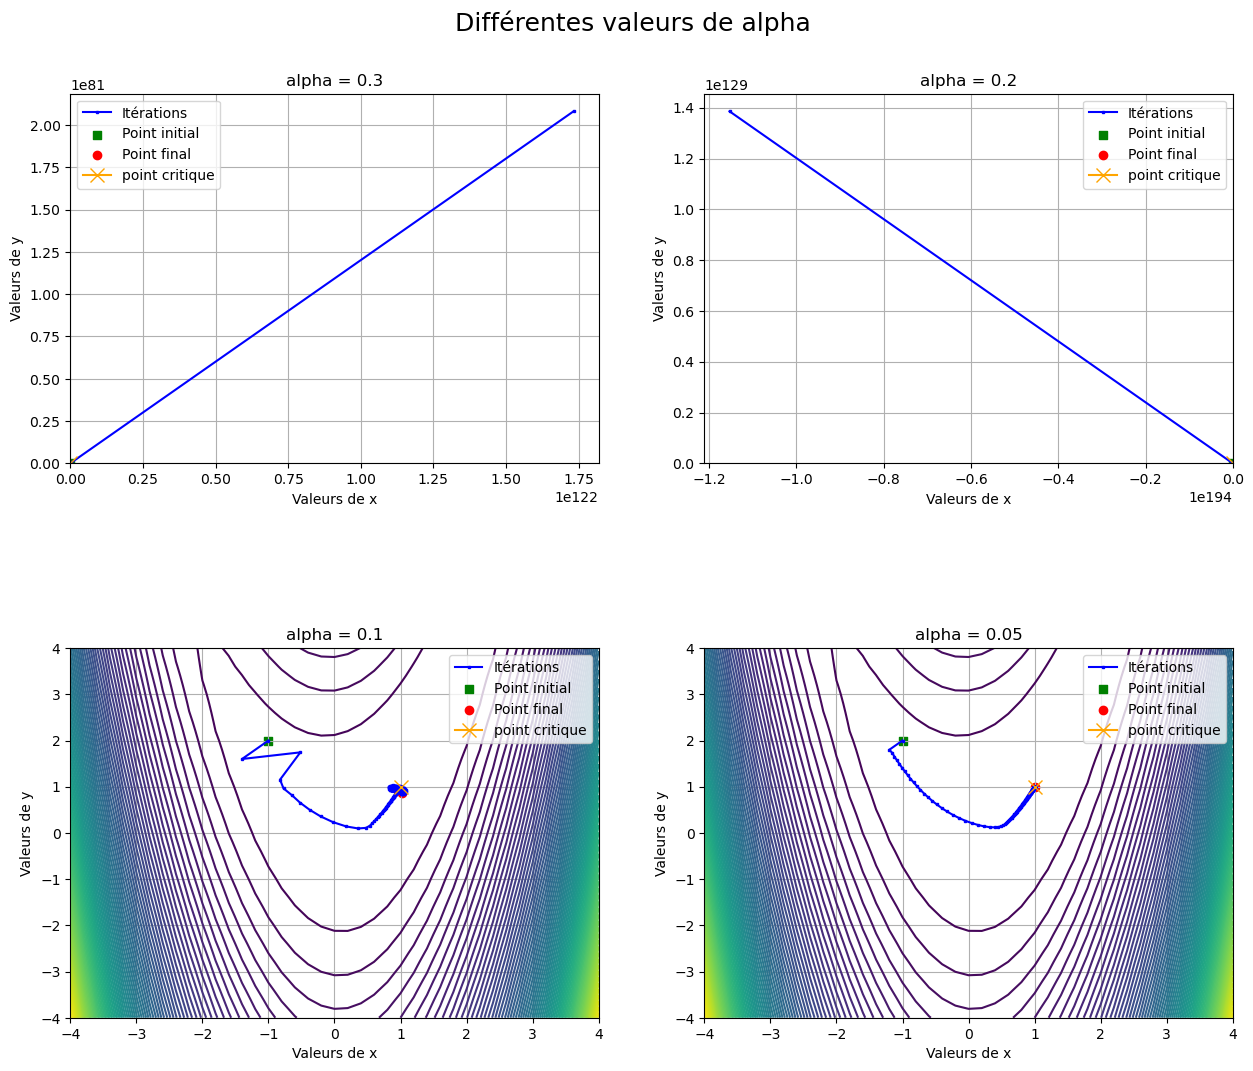

In [5]:
point_initial = [-1,2]
epsilon = 1e-5
max_iterations = 1000
alpha_values = [0.3,0.2,0.1,0.05]

# Définition du domaine de tracé
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Différentes valeurs de alpha", fontsize=18, y=0.95)

for n, alpha in enumerate(alpha_values):
    ax = plt.subplot(2,2, n + 1)
    ax.contour(x2d, y2d, J(x2d, y2d), nIso)
    path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='Itérations')
    ax.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
    ax.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
    ax.plot(1,1,marker = "x",color = 'orange', ms = 10, label = 'point critique')
    ax.set_title(f'alpha = {alpha}')
    ax.set_xlabel('Valeurs de x')
    ax.set_ylabel('Valeurs de y')
    ax.grid()
    ax.legend()


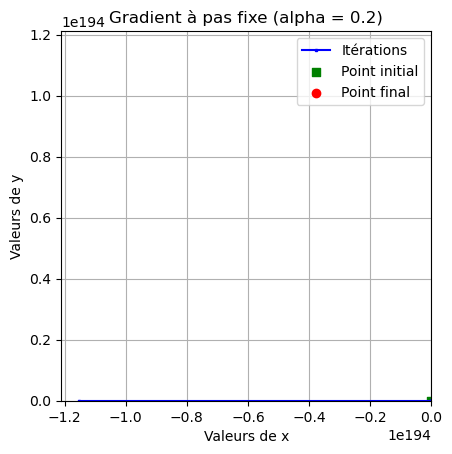

Ne converge pas après 1000 iterations.


In [6]:
# Test de l'algorithme : 
#Paramètres
point_initial = [-1,2] #X0
alpha = 0.2
epsilon = 1e-5
max_iterations = 1000

# Exécution de l'algorithme
path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)

# Définition du domaine de tracé
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de J
nIso = 100
plt.contour(x2d, y2d, J(x2d, y2d), nIso)

#Tracé du graphe
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='Itérations')
plt.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
plt.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
plt.title('Gradient à pas fixe (alpha = 0.2)')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.legend()
plt.grid()
plt.axis('square')

plt.show()

if convergence:
    print(f"Convergence en {len(path)} iterations. Point final: {path[-1]}")
else:
    print(f"Ne converge pas après {max_iterations} iterations.")

#### Epsilons

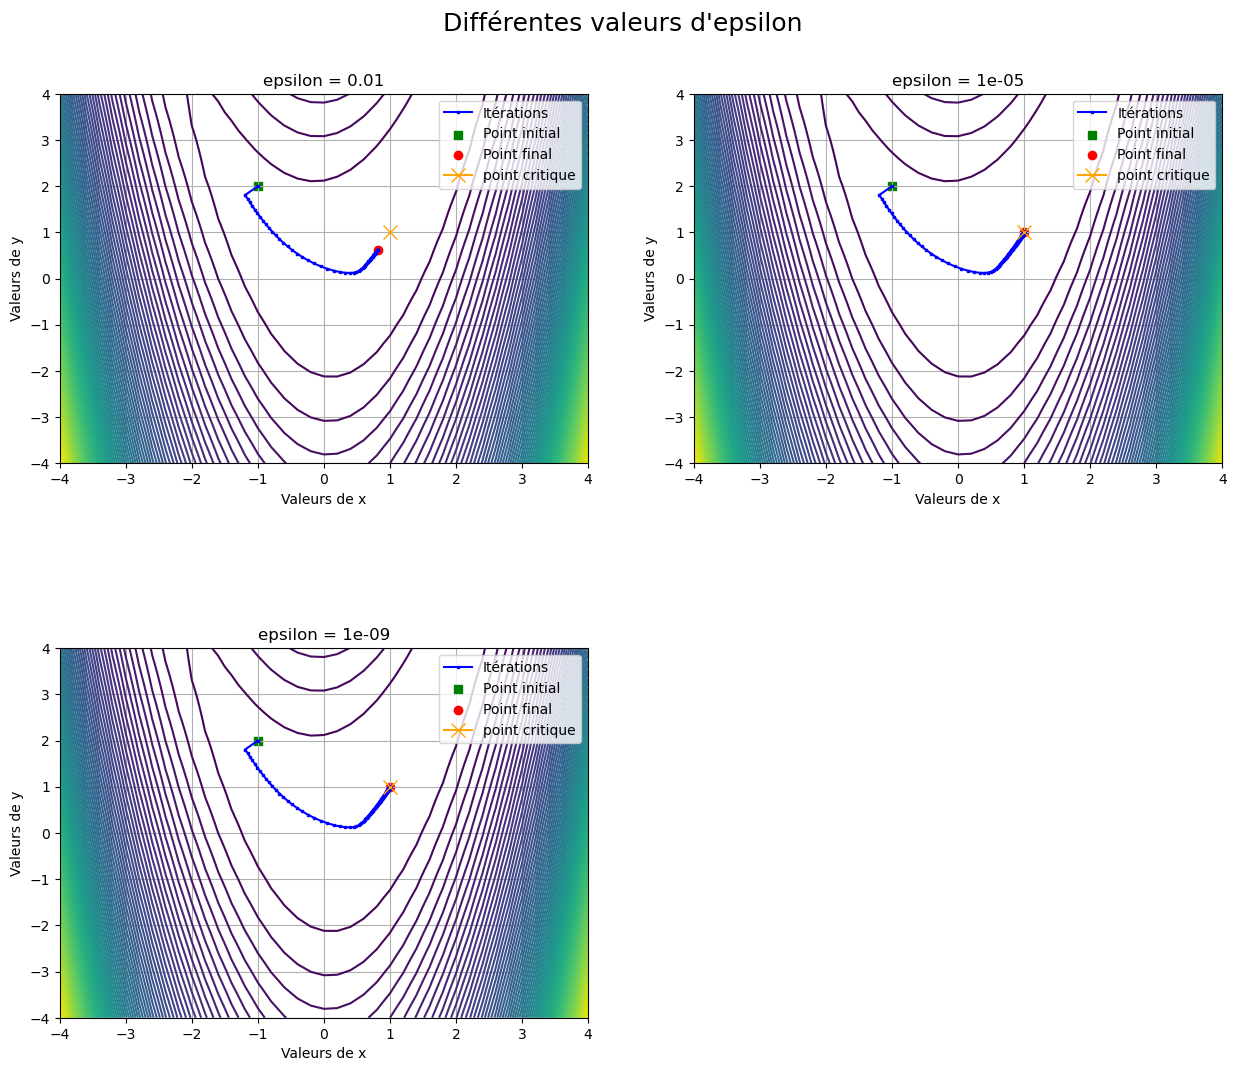

In [7]:
point_initial = [-1,2]
epsilon_values = [10e-3,10e-6,10e-10] 
max_iterations = 1000
alpha = [0.05]

# Définition du domaine de tracé
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Différentes valeurs d'epsilon", fontsize=18, y=0.95)

for n, epsilon in enumerate(epsilon_values):
    ax = plt.subplot(2,2, n + 1)
    ax.contour(x2d, y2d, J(x2d, y2d), nIso)
    path, convergence = gradient_descent(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], marker='s',markersize=2, color='blue', label='Itérations')
    ax.scatter(path[0, 0], path[0, 1], marker='s', color='green', label='Point initial')
    ax.scatter(path[-1, 0], path[-1, 1], marker='o', color='red', label='Point final')
    ax.plot(1,1,marker = "x",color = 'orange', ms = 10, label = 'point critique')
    ax.set_title(f'epsilon = {epsilon}')
    ax.set_xlabel('Valeurs de x')
    ax.set_ylabel('Valeurs de y')
    ax.grid()
    ax.legend()


On met en évidence ci-dessous que l'algorithme diverge si alpha dépasse une certaine valeur. On choisit un epsilon pas très petit, ici 1e-3

In [8]:
point_initial = [-1,2]
epsilon = 1e-3
max_iterations = 1000
alpha_values = [0.001,0.01, 0.1, 0.15, 0.2]
divergence_alpha = {}

# Définition du domaine de tracé
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Différentes valeurs de alpha", fontsize=18, y=0.95)

for alpha in alpha_values:
    path, convergence, n_iterations = gradient_descent_n(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    if convergence:
        print(f"Convergé avec alpha={alpha} dans {n_iterations} itérations.")
    else:
        print(f"Diverge avec alpha={alpha} après {n_iterations} itérations.")

Diverge avec alpha=0.001 après 1000 itérations.
Convergé avec alpha=0.01 dans 430 itérations.
Convergé avec alpha=0.1 dans 98 itérations.
Diverge avec alpha=0.15 après 13 itérations.
Diverge avec alpha=0.2 après 9 itérations.


<Figure size 1500x1200 with 0 Axes>

In [9]:
point_initial = [-1,2]
epsilon = 1e-3
max_iterations = 1000
alpha_values = np.arange(0.1, 0.15, 0.005)
divergence_alpha = {}

# Définition du domaine de tracé
xmin, xmax, nx = -4,4,41
ymin, ymax, ny = -4,4,41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de J
nIso = 100

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Différentes valeurs de alpha", fontsize=18, y=0.95)

for alpha in alpha_values:
    path, convergence, n_iterations = gradient_descent_n(J, gradient_J, point_initial, alpha, epsilon, max_iterations)
    if convergence:
        print(f"Convergé avec alpha={alpha} en {len(path)} iterations. Point final: {path[-1]}")
    else:
        print(f"Ne converge pas avec alpha={alpha} après {max_iterations} iterations.")

Convergé avec alpha=0.1 en 99 iterations. Point final: [0.98970414 0.9774017 ]
Convergé avec alpha=0.10500000000000001 en 94 iterations. Point final: [0.98993612 0.97790958]
Ne converge pas avec alpha=0.11000000000000001 après 1000 iterations.
Ne converge pas avec alpha=0.11500000000000002 après 1000 iterations.
Ne converge pas avec alpha=0.12000000000000002 après 1000 iterations.
Ne converge pas avec alpha=0.12500000000000003 après 1000 iterations.
Ne converge pas avec alpha=0.13000000000000003 après 1000 iterations.
Ne converge pas avec alpha=0.13500000000000004 après 1000 iterations.
Ne converge pas avec alpha=0.14000000000000004 après 1000 iterations.
Ne converge pas avec alpha=0.14500000000000005 après 1000 iterations.


<Figure size 1500x1200 with 0 Axes>

En effet, l'algorithme diverge pour alpha supérieur à 0.13.

## Problème 2 :
Le point $M_{1}$ appartient à la parabole $P_{1}$ d'équation $u+\frac{1}{2} (v-2)^{2}-1 = 0$. Le point $M_{2}$ appartient à la parabole $P_{2}$ d'équationn $v-(u-3)^{2} - 2 = 0$. On souhaite déterminier les coordonnées des points $M_{1}$ et $M_{2}$, respectivement notés $(x_{1},x_{2})$ et $(x_{3},x_{4})$ de façon à minimiser la distance entre $M_{1}$ et $M_{2}$.

* Faire une figure représentant les données du problème, puis mettre le problème sous la forme d’un problème d’optimisation sous contraintes-égalités (variables de décision, fonction coût, contraintes).
* Appliquer la méthode des multiplicateurs de Lagrange pour résoudre le problème. Le système d’équations obtenu sera résolu numériquement par la fonction scipy.optimize.root.
* Faire une figure montrant la solution et les élements géométriques remarquables

### Figure de représentation et visualisation des paraboles :


In [10]:
# Définition du parabole P1
v1_vals = np.linspace(-10,10,20)
u1 = 1 - 0.5*(v1_vals- 2)**2

# Définition du parabole P2
u2_vals = np.linspace(-10,10,20)
v2 = 2 + (u2_vals - 3)**2

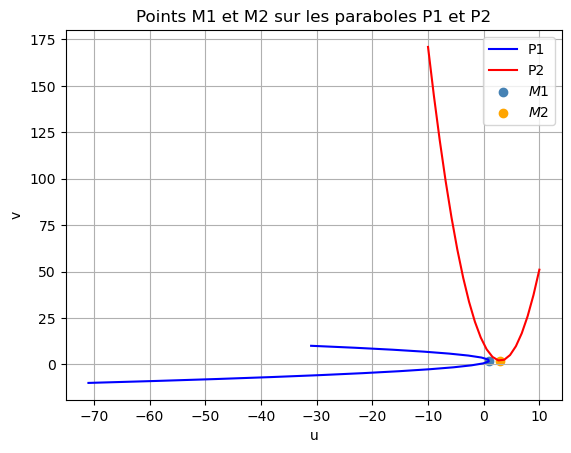

In [11]:
# Points satisfaisant P1 et P2
M1 = [1,2]
M2 = [3,2]

# Tracé du graphe
plt.clf()
plt.plot(u1, v1_vals, color='b', label='P1')
plt.plot(u2_vals, v2, color='r', label='P2')
plt.scatter(*M1, color='steelblue', label='$M1$')
plt.scatter(*M2, color='orange', label='$M2$')
plt.title('Points M1 et M2 sur les paraboles P1 et P2')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()


**Nous remarquons ici que pour P1, la fonction y(x) n'est pas définie pour x>1, ce qui explique notre représentation limitée à la définition de cette variable.**



### Problème sous contraintes-égalités:
La fonction à minimiser ici est la fonction distance entre $M_1$ et $M_2$, ce qui équivaut à minimiser son carré. Ce choix est effectué car d'une part, les deux fonctions sont proprortionnellement croissantes, et d'autre part aprce que la fonction carrée est dérivable et convexe, facilitant ainsi nos calculs.


* Variables de décision  : $X = (u_{1},u_{2},v_{1},v_{2})$ avec $M_1$=($u_{1},v_{1}$) et $M_2$=($u_{2},v_{2}$).
* Fonction coût : $J(u_{1},u_{2},v_{1},v_{2}) = (u_{1}-u_{2})^{2}+(v_{1}-v_{2})^{2}$
* Contraintes :
    * $C_{1}(X) = u_{1}+\frac{1}{2} (v_{1}-2)^{2}-1 = 0$
    * $C_{2}(X) = v_{2}-(u_{2}-3)^{2} - 2 = 0$

### Méthodes des multiplicateurs de Lagrange

Calculons à présent les Gradients $\nabla C_{1}$,$\nabla C_{2}$ et $\nabla J$ afin d'appliquer la formule vue en cours suivante, où $x^{*}$ représente le vecteur solution de notre problème.  

$\nabla J  (x^{*})+ \lambda_{1}\nabla C_{1}(x^{*}) + \lambda_{2}\nabla C_{2}(x^{*}) = 0$


  \begin{align}
    \nabla J_(x^{*}) &= \begin{bmatrix}
      2(u1-u2)\\
      -2(u1-u2)\\
      2(v1-v2)\\
      -2(v1-v2)
      \end{bmatrix}
  \end{align}

  \begin{align}
    \nabla C_{1}(x^{*}) &= \begin{bmatrix}
      1\\
      0\\
      v1-2 \\
      0
      \end{bmatrix}
  \end{align}

  \begin{align}
    \nabla C_{2}(x^{*}) &= \begin{bmatrix}
      0 \\
      -2(u2-3) \\
      0 \\
      1
      \end{bmatrix}
  \end{align}

  Nous obtenons ainsi le système suivant, résolu par la fonction scipy.optimize.root.

\begin{equation}
    \begin{cases}
    2(u1-u2)+\lambda _{1} =0\\
    -2(u1-u2)-2\lambda _{2}(u2-3)=0\\
    2(v1-v2)+\lambda {1}(v1-2) =0\\
    -2(v1-v2)+\lambda _{2} = 0\\
    u1+0.5(v1-2)^2 -1=0\\
    v2-(u2-3)^2 -2=0
    
    \end{cases}\,.
\end{equation}

In [12]:
sol = optimize.root(base_fun, [0,0,0,0,0,0])
print(sol)
print(sol.x)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.692e-10 -2.176e-10  1.287e-10  1.261e-11 -3.196e-11
            9.888e-12]
       x: [ 8.791e-01  1.983e+00  2.492e+00  3.034e+00  2.208e+00
           -1.085e+00]
    nfev: 45
    fjac: [[-7.021e-01  6.260e-01 ... -3.347e-01 -4.346e-03]
           [-3.035e-02 -2.511e-01 ... -3.104e-01 -7.263e-01]
           ...
           [ 6.421e-01  5.545e-01 ... -2.663e-01  1.857e-01]
           [ 9.312e-02 -3.202e-01 ... -8.141e-01  2.655e-01]]
       r: [-2.893e+00  2.623e+00 ...  1.587e+00 -1.116e+00]
     qtf: [ 1.225e-08  1.928e-10  2.879e-09  3.195e-09  1.949e-08
           -1.159e-08]
[ 0.87914761  1.98298493  2.4916348   3.03431964  2.20767465 -1.08536969]


### Figure montrant la solution et les éléments géométriques remarquables:

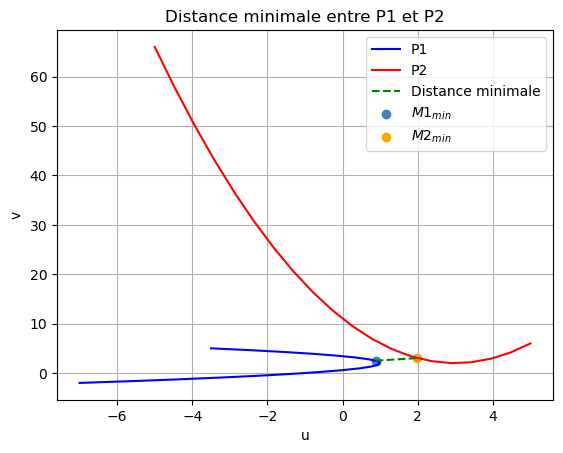

In [13]:
# Tracé du graphe avec la distance minimale
plt.clf()

# Définition du parabole P1
v1_vals = np.linspace(-2,5,20)
u1 = 1 - 0.5*(v1_vals- 2)**2

#P2
u2_vals = np.linspace(-5,5,20)
v2 = 2 + (u2_vals - 3)**2

#Coordonnés des points M1, M2
m1 = [sol.x[0], sol.x[2]]
m2 = [sol.x[1], sol.x[3]]

plt.plot(u1, v1_vals, color='b', label='P1')
plt.plot(u2_vals, v2, color='r', label='P2')
plt.plot([sol.x[0], sol.x[1]], [sol.x[2],sol.x[3]],color='green', linestyle="--", label='Distance minimale')
plt.scatter(*m1, color='steelblue', label='$M1_{min}$')
plt.scatter(*m2, color='orange', label='$M2_{min}$')
plt.title('Distance minimale entre P1 et P2')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()

## Exercice 3:

### Enoncé

On reprend la fonction du problème 1, mais on souhaite maitenant mettre en œuvre la méthode du gradient à pas optimal pour déterminer le minimum de cette fonction.
* Une itération de la méthode du gradient à pas optimal consiste à déterminer $(x_{1,n+1}, x_{2,n+1})$ le minimum de 𝐽 dans la direction du gradient de 𝐽 au point $x_{1,n}, x_{2,n}$, solution approchée en début d’itération. Formuler
ce problème comme un problème de minimisation sous contrainte-égalité.
* Appliquer la méthode des multiplicateurs de Lagrange pour résoudre le problème posé ci-dessus (1 itération de la méthode du gradient optimal). Vous pouvez utiliser la fonction scipy.optimize.root pour la résolution du système d’équations obtenu. Attention, la fonction root peut ne pas réussir à
résoudre le système. Comme pour toute méthode numérique, il faut donc tester l’indicateur de succès de la fonction (voir documentation) avant d’en accepter les résultats.
* Faire une figure montrant 1 itération de la méthode du gradient optimal et les élements géométriques remarquables.
* Enchainer quelques itérations de la méthode du gradient optimal et faire une figure montrant le résultat et les élements géométriques remarquables.
* Maintenant que vous savez comment ça marche, utiliser la fonction scipy.optimize.minimize pour ne plus avoir à implémenter d’algorithme de recherche de minimum !

### Problème de minimisation sous contrainte-égalité.
$G(\alpha) = J[X_n - \alpha \cdot \nabla J(X_n)]$ 

La fonction à minimiser ici est $J(X_{n+1})$, c'est-à-dire trouver $X_{n+1}$ appartenant à la droite $D(X_n,\vec{\nabla J}(X_n))$
* avec fonction coût:
    * $J_3(x_1,x_2) = (x_1-1)^2 +2(x_1^2-x_2)^2$ 
* variables de décision:  
    * $X = (x1,x2,l)$
* Contraintes :
    * $C(X_{n+1})=0$

* \begin{align}
    \nabla J_(x^{*}) &= \begin{bmatrix}
      2(x1-1)+2*2*2*x1(x1^2-x2)\\
      -2*2(x1^2-x2)
      \end{bmatrix}
  \end{align}

Cela vient du fait que :
* $\vec{X_nX_{n+1}} // \vec{\nabla J}(X_n)$, 
* $det(\vec{X_1X_{n+1}}, \vec{\nabla J}(X_n))=0 \\ 
= dJ_{Yn}(X-X_n)-dJ_{Xn}(Y-Y_n)=C(X,Y)$.
* $\nabla C = \begin{bmatrix}
      dJ_{Yn}\\
      -dJ_{Xn}
      \end{bmatrix} $

Pour la suite, on utilisera x pour x1 et y pour x2 afin de simplier l'écriture.

#### Méthode des multiplicateurs de Lagrange

In [14]:
#point de départ : X = [-1,2]
X_var = [-1,2,1]
X = [-1,2]
dX = gradient_J3(X)
param = [X[0],X[1],dX[0],dX[1]]
sol = opt.root(systeme,X_var,param)
sol.x
print(sol.message)

The solution converged.


##### Figure de 1 itération de la méthode du gradient optimal.

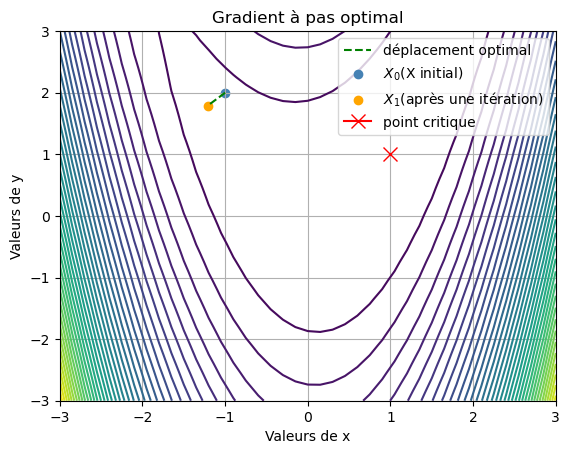

In [15]:
# Tracé d'une iteration de la methode du gradient optimal
plt.clf()

# Définition du domaine de tracé
xmin, xmax, nx = -3,3, 41
ymin, ymax, ny = -3, 3, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

#Coordonnés de point p1,
p1 = [sol.x[0], sol.x[1]]


# Tracé des isovaleurs de J
nIso = 41
plt.contour(x2d, y2d, J3([x2d, y2d]), nIso)

#Tracé du graphe
plt.plot([X[0], sol.x[0]], [X[1],sol.x[1]],color='green', linestyle="--", label='déplacement optimal')
plt.scatter(*X, color='steelblue', label='$X_0 $(X initial)')
plt.scatter(*p1, color='orange', label='$X_1 $(après une itération)')
plt.plot(1,1,marker = "x",color = 'red', ms = 10, label = 'point critique')
plt.title('Gradient à pas optimal')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.legend()
plt.grid()
#plt.axis('square')

plt.show()

#### Fonction pour faire plusieurs itérations

##### Figure 

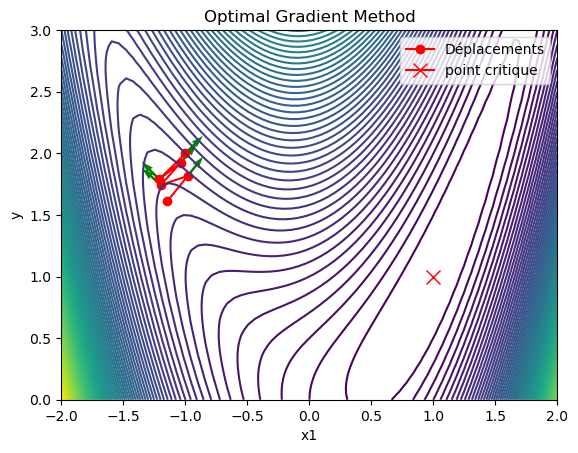

In [16]:
# Initial point
initial_point = np.array([-1, 2, 1])

# Perform several iterations of the method
max_iterations = 5
path = gradient_descent_optimal(initial_point, max_iterations)

# Plot the results
path = np.array(path)

# Extract x and y coordinates
x_values = path[:, 0]
y_values = path[:, 1]

# Plot the scatter points
#plt.scatter(x_values[0], y_values[0], label='X_0')
#plt.scatter(x_values[-1], y_values[-1], label='X_f')

# Plot the line connecting the points
plt.plot(x_values, y_values, marker='o', linestyle='-', color='red', label='Déplacements')

# Tracé des isovaleurs de J
# Définition du domaine de tracé
xmin, xmax, nx = -2,2, 70 
ymin, ymax, ny = 0, 3,70
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)
nIso = 100
plt.contour(x2d, y2d, J3([x2d, y2d]), nIso)
# Ajouter les vecteurs gradients
for i in range(len(x_values)-1):
    current_point = np.array([x_values[i], y_values[i]])
    next_point = np.array([x_values[i+1], y_values[i+1]])
    gradient_vector = gradient_J3(current_point)
    gradient_vector /= np.linalg.norm(gradient_vector)
    # Plot the vector
    plt.quiver(current_point[0], current_point[1], gradient_vector[0], gradient_vector[1],
               scale=20, color='green', width=0.005)
plt.plot(1,1,marker = "x",color = 'red', ms = 10, label = 'point critique')
plt.title('Optimal Gradient Method')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

#### scipy.optimize.minimize

Résultats de la minimisation :
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.032318417686023e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 13
      jac: [-1.080e-07 -5.054e-06]
 hess_inv: [[ 4.889e-01  9.777e-01]
            [ 9.777e-01  2.205e+00]]
     nfev: 54
     njev: 18


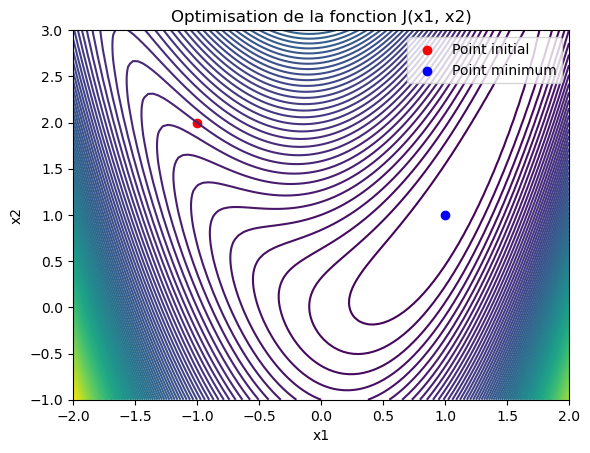

In [18]:
import numpy as np
from scipy.optimize import minimize

# Définition de la fonction J(x1, x2)
def J(x):
    x1, x2 = x
    return (x1 - 1)**2 + 2 * (x1**2 - x2)**2

# Point initial
initial_point = np.array([-1, 2])

# Utilisation de minimize
result = minimize(J, initial_point, method='BFGS')

# Affichage des résultats
print("Résultats de la minimisation :")
print(result)

# Définition du domaine de tracé
xmin, xmax, nx = -2,2,100
ymin, ymax, ny = -1,3,100
# Discrétisation du domaine de tracé
x1_vals = np.linspace(xmin, xmax, nx)
x2_vals = np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = J([X1, X2])

# Tracé de la fonction J(x1, x2)
niso=100
plt.contour(X1, X2, Z, nIso)

# Point initial
plt.scatter(initial_point[0], initial_point[1], color='red', label='Point initial')

# Point du minimum
min_point = result.x
plt.scatter(min_point[0], min_point[1], color='blue', label='Point minimum')

# Lignes de niveau
plt.title('Optimisation de la fonction J(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
